In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

###运行环境

In [29]:
!pip list

Package                  Version              
------------------------ ---------------------
absl-py                  0.7.1                
alabaster                0.7.12               
albumentations           0.1.12               
altair                   3.1.0                
astor                    0.8.0                
astropy                  3.0.5                
atari-py                 0.1.15               
atomicwrites             1.3.0                
attrs                    19.1.0               
audioread                2.1.8                
autograd                 1.2                  
Babel                    2.7.0                
backcall                 0.1.0                
backports.tempfile       1.0                  
backports.weakref        1.0.post1            
beautifulsoup4           4.6.3                
bleach                   3.1.0                
blis                     0.2.4                
bokeh                    1.0.4                
boto         

In [0]:
##### 合并分卷压缩文件
!zip -s 0 public_test_data.zip --out test_data.zip 

###编译ctpn

In [0]:
!cd ./drive/my_gpu/tinymind/text-detection-ctpn/utils/bbox;chmod +x make.sh;./make.sh
!wget http://download.tensorflow.org/models/vgg_16_2016_08_28.tar.gz
!tar -zvxf vgg_16_2016_08_28.tar.gz

###生成训练数据(训练部分,验证直接略过此步骤)

In [0]:
!mkdir -p /content/data/dataset/mlt/

In [0]:
!cd ./drive/my_gpu/tinymind/text-detection-ctpn/utils/prepare;python ./split_label.py

In [0]:
!ls -lh ./data/dataset/mlt/image | wc -l

164


In [0]:
!cd ./drive/my_gpu/tinymind/text-detection-ctpn;python ./main/train.py

###复制训练和测试数据集

In [0]:
!cp ./drive/my_gpu/tinymind/test_data.zip ./;unzip test_data.zip
!cp ./drive/my_gpu/tinymind/tinymind.zip ./;unzip tinymind.zip

In [0]:
!rm -rf ./data_res;mkdir ./data_res;mkdir ./data_res/img;mkdir ./data_res/txt

### 检测编码位置,截取并保存

In [0]:
!cp ./drive/my_gpu/tinymind/juesai/private_test_data.zip ./;unzip private_test_data.zip

In [0]:
!mkdir public_test_data_repair
!cp ./private_test_data/* ./public_test_data_repair/

In [0]:
!cd ./drive/my_gpu/tinymind/text-detection-ctpn;python ./main/demo.py

###保存结果，第二天用，忽略这里

In [0]:
!find ./crnn_input_data/ -name '*' -print | zip crnn_input_test.zip -@
!cp crnn_input_test.zip ./drive/my_gpu/tinymind

### 三个模型检测结果不一致，并且不符合正则的图片，进行重新截取，会对上下左右进行扩充

In [0]:
!cd ./drive/my_gpu/tinymind/text-detection-ctpn;python ./main/demo_1.py

###第一个模型,crnn

In [0]:
!cp ./drive/my_gpu/tinymind/test_cptn_result.zip ./;unzip test_cptn_result.zip
!cp ./drive/my_gpu/tinymind/train_cptn_result.zip ./;unzip train_cptn_result.zip

In [17]:
!git clone https://github.com/hwwu/cptn-crnn.git

Cloning into 'cptn-crnn'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 225 (delta 1), reused 2 (delta 0), pack-reused 219
Receiving objects: 100% (225/225), 286.32 KiB | 405.00 KiB/s, done.
Resolving deltas: 100% (61/61), done.


In [18]:
!pip3 install https://download.pytorch.org/whl/cu100/torch-1.1.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

In [19]:
!git clone https://github.com/SeanNaren/warp-ctc.git
!cd warp-ctc;mkdir build; cd build;cmake ..;make
!cd ./warp-ctc/pytorch_binding;python setup.py install

Cloning into 'warp-ctc'...
remote: Enumerating objects: 752, done.
remote: Total 752 (delta 0), reused 0 (delta 0), pack-reused 752
Receiving objects: 100% (752/752), 375.39 KiB | 417.00 KiB/s, done.
Resolving deltas: 100% (379/379), done.
-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pth

In [26]:
!ls -lh ./warp-ctc/pytorch_binding/build/lib.linux-x86_64-3.6/warpctc_pytorch
!cp -r ./warp-ctc/pytorch_binding/build/lib.linux-x86_64-3.6/warpctc_pytorch ./cptn-crnn/crnn
!ls -lh ./cptn-crnn/crnn/warpctc_pytorch

total 4.4M
-rw-r--r-- 1 root root 2.9K Jul  4 02:04 __init__.py
-rwxr-xr-x 1 root root 4.4M Jul  4 02:06 _warp_ctc.cpython-36m-x86_64-linux-gnu.so
total 4.4M
-rw-r--r-- 1 root root 2.9K Jul  4 02:20 __init__.py
-rwxr-xr-x 1 root root 4.4M Jul  4 02:20 _warp_ctc.cpython-36m-x86_64-linux-gnu.so


In [0]:
# !cp ./drive/my_gpu/tinymind/train_cptn_result.zip ./;unzip train_cptn_result.zip
!cp ./drive/my_gpu/tinymind/test_cptn_result.zip ./;unzip test_cptn_result.zip

###制作训练数据集

In [0]:
!mkdir crnn_train_data;mkdir crnn_val_data

In [0]:
import lmdb  # install lmdb by "pip install lmdb"
import cv2
from PIL import Image, ImageFilter
import numpy as np
import pandas as pd
import os


def SaltAndPepper(src, percetage):
    SP_NoiseImg = src.copy()
    SP_NoiseNum = int(percetage * src.shape[0] * src.shape[1])
    for i in range(SP_NoiseNum):
        randR = np.random.randint(0, src.shape[0] - 1)
        randG = np.random.randint(0, src.shape[1] - 1)
        randB = np.random.randint(0, 3)
        if np.random.randint(0, 1) == 0:
            SP_NoiseImg[randR, randG, randB] = 0
        else:
            SP_NoiseImg[randR, randG, randB] = 255
    return SP_NoiseImg


def addGaussianNoise(image, percetage):
    G_Noiseimg = image.copy()
    w = image.shape[1]
    h = image.shape[0]
    G_NoiseNum = int(percetage * image.shape[0] * image.shape[1])
    for i in range(G_NoiseNum):
        temp_x = np.random.randint(0, h)
        temp_y = np.random.randint(0, w)
        G_Noiseimg[temp_x][temp_y][np.random.randint(3)] = np.random.randn(1)[0]
    return G_Noiseimg


# dimming
def darker(image, percetage=0.9):
    image_copy = image.copy()
    w = image.shape[1]
    h = image.shape[0]
    # get darker
    for xi in range(0, w):
        for xj in range(0, h):
            image_copy[xj, xi, 0] = int(image[xj, xi, 0] * percetage)
            image_copy[xj, xi, 1] = int(image[xj, xi, 1] * percetage)
            image_copy[xj, xi, 2] = int(image[xj, xi, 2] * percetage)
    return image_copy


def brighter(image, percetage=1.5):
    image_copy = image.copy()
    w = image.shape[1]
    h = image.shape[0]
    # get brighter
    for xi in range(0, w):
        for xj in range(0, h):
            image_copy[xj, xi, 0] = np.clip(int(image[xj, xi, 0] * percetage), a_max=255, a_min=0)
            image_copy[xj, xi, 1] = np.clip(int(image[xj, xi, 1] * percetage), a_max=255, a_min=0)
            image_copy[xj, xi, 2] = np.clip(int(image[xj, xi, 2] * percetage), a_max=255, a_min=0)
    return image_copy


def rotate(image, angle=15, scale=0.9):
    w = image.shape[1]
    h = image.shape[0]
    # rotate matrix
    M = cv2.getRotationMatrix2D((w / 2, h / 2), angle, scale)
    # rotate
    image = cv2.warpAffine(image, M, (w, h))
    return image


def average(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # [x,y] is the kernel for bluring
    # the large kernel becomes, the more blurred imag will appear
    # hstack is able to stack multiple images together
    # using simple mean to average
    image = cv2.blur(gray, (7, 7))
    return image


def gaussian(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # [x,y] is the kernel for bluring
    # the large kernel becomes, the more blurred imag will appear
    # hstack is able to stack multiple images together
    # using simple mean to average
    image = cv2.GaussianBlur(gray, (7, 7), 0)
    return image


def median(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # [x,y] is the kernel for bluring
    # the large kernel becomes, the more blurred imag will appear
    # hstack is able to stack multiple images together
    # using simple mean to average
    image = cv2.medianBlur(gray, 7)
    return image


def bilateral(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # [x,y] is the kernel for bluring
    # the large kernel becomes, the more blurred imag will appear
    # hstack is able to stack multiple images together
    # using simple mean to average
    image = cv2.bilateralFilter(gray, 9, 41, 41)
    return image


def checkImageIsValid(imageBin):
    if imageBin is None:
        return False
    try:
        imageBuf = np.fromstring(imageBin, dtype=np.uint8)
        img = cv2.imdecode(imageBuf, cv2.IMREAD_GRAYSCALE)
        imgH, imgW = img.shape[0], img.shape[1]
    except:
        return False
    else:
        if imgH * imgW == 0:
            return False
    return True


def writeCache(env, cache):
    with env.begin(write=True) as txn:
        for k, v in cache.items():
            if (isinstance(v, bytes)):
                txn.put(k.encode(), v)
            else:
                txn.put(k.encode(), v.encode())


def createDataset(outputPath, imagePathList, labelList, lexiconList=None, checkValid=True):
    """
    Create LMDB dataset for CRNN training.
    ARGS:
        outputPath    : LMDB output path
        imagePathList : list of image path
        labelList     : list of corresponding groundtruth texts
        lexiconList   : (optional) list of lexicon lists
        checkValid    : if true, check the validity of every image
    """
    assert (len(imagePathList) == len(labelList))
    nSamples = len(imagePathList)
    env = lmdb.open(outputPath, map_size=1099511627776)
    cache = {}
    cnt = 1
    for i in range(nSamples):
        imagePath = os.path.join(DATA_FOLDER, imagePathList[i])
        # print(imagePath)
        label = ''.join(labelList[i])
        # print(label)
        if not os.path.exists(imagePath):
            print('%s does not exist' % imagePath)
            continue

        image = cv2.imread(imagePath)

#         image = cv2.resize(image, (192, 32))

        image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        # image1 = image.filter(ImageFilter.CONTOUR)
#         image2 = image.filter(ImageFilter.SMOOTH_MORE)
        # image3 = image.filter(ImageFilter.GaussianBlur(radius=1.3))
        for img in [image]:
            mew_images = cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)

            for mew_image in [mew_images
                # , SaltAndPepper(mew_images, 0.3), addGaussianNoise(mew_images, 0.3)
                              # , brighter(mew_images), darker(mew_images), gaussian(mew_images), median(mew_images),
                              #               bilateral(mew_images)
                              ]:

                img_encode = cv2.imencode('.jpg', mew_image)[1]
                data_encode = np.array(img_encode)
                imageBin = data_encode.tostring()

                if checkValid:
                    if not checkImageIsValid(imageBin):
                        print('%s is not a valid image' % imagePath)
                        continue
                imageKey = 'image-%09d' % cnt
                labelKey = 'label-%09d' % cnt
                cache[imageKey] = imageBin
                cache[labelKey] = label
                if lexiconList:
                    lexiconKey = 'lexicon-%09d' % cnt
                    cache[lexiconKey] = ' '.join(lexiconList[i])
                if cnt % 1000 == 0:
                    writeCache(env, cache)
                    cache = {}
                    print('Written %d / %d' % (cnt, nSamples))
                cnt += 1
        # print(cnt)
    nSamples = cnt - 1
    cache['num-samples'] = str(nSamples)
    writeCache(env, cache)
    print('Created dataset with %d samples' % nSamples)


# DATA_FOLDER = "./train_cptn_result/"

# outputPath = "./crnn_train_data/"
# imageList = []

# label = pd.read_csv('./train_id_label.csv')
# mianzhi = pd.read_csv('./train_face_value_label.csv')
# print(label.shape)
# labelList = []
# for index, row in label.iterrows():
#     if row['name'] in mianzhi['name'].values:
#       imageList.append(row['name'])
#       labelList.append(row['label'].strip())
# print(len(labelList))
# # import random
# # random.shuffle(imageList)
# createDataset(outputPath, imageList, labelList)


In [0]:
label = pd.read_csv('./train_id_label.csv')
DATA_FOLDER = "./train_cptn_result/"
outputPath = "./crnn_train_data/"
imageList = []
labelList = []
label = label[:37000]
img_nameList = os.listdir('./train_cptn_result_repair')
for index, row in label.iterrows():
  if row['name'] in img_nameList:
    print(row['name'])
    for i in range(200):
      imageList.append(row['name'])
      labelList.append(row['label'].strip())
  else:
    imageList.append(row['name'])
    labelList.append(row['label'].strip())
print(len(labelList))
createDataset(outputPath, imageList, labelList)

label = pd.read_csv('./train_id_label.csv')
DATA_FOLDER = "./train_cptn_result/"
outputPath = "./crnn_val_data/"
imageList = []
labelList = []
label = label[37000:]
for index, row in label.iterrows():
    imageList.append(row['name'])
    labelList.append(row['label'].strip())
print(len(labelList))
createDataset(outputPath, imageList, labelList)

3891
(272, 45) K1E6457033


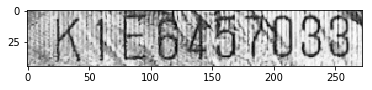

494
(256, 40) QK65434011


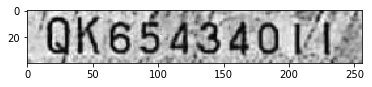

(tensor([[[-0.1608, -0.1686, -0.1843,  ..., -0.4980, -0.3412, -0.3333],
          [-0.1529, -0.1686, -0.1843,  ..., -0.4980, -0.2549, -0.2627],
          [-0.1686, -0.1686, -0.1922,  ..., -0.5137, -0.2549, -0.2627],
          ...,
          [-0.2941, -0.2706, -0.1686,  ..., -0.3882, -0.3333, -0.3490],
          [-0.3647, -0.3725, -0.2627,  ..., -0.3255, -0.3647, -0.4196],
          [-0.3412, -0.3961, -0.3176,  ..., -0.3255, -0.4667, -0.5529]]]),
 b'QK65434011')

In [0]:
import random
import torch
from torch.utils.data import Dataset
from torch.utils.data import sampler
import torchvision.transforms as transforms
import lmdb
import six
import sys
from PIL import Image, ImageFilter
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


class lmdbDataset(Dataset):

    def __init__(self, root=None, transform=None, target_transform=None):
        self.env = lmdb.open(
            root,
            max_readers=1,
            readonly=True,
            lock=False,
            readahead=False,
            meminit=False)

        if not self.env:
            print('cannot creat lmdb from %s' % (root))
            sys.exit(0)

        with self.env.begin(write=False) as txn:
            str = 'num-samples'
            nSamples = int(txn.get(str.encode()))
            self.nSamples = nSamples

        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return self.nSamples

    def __getitem__(self, index):
        assert index <= len(self), 'index range error'
        index += 1
        with self.env.begin(write=False) as txn:
            img_key = 'image-%09d' % index
            imgbuf = txn.get(img_key.encode())

            buf = six.BytesIO()
            buf.write(imgbuf)
            buf.seek(0)
            try:
                img = Image.open(buf).convert('L')
            except IOError:
                print('Corrupted image for %d' % index)
                return self[index + 1]

            if self.transform is not None:
                img = self.transform(img)

            label_key = 'label-%09d' % index
            label = txn.get(label_key.encode())

            if self.target_transform is not None:
                label = self.target_transform(label)
        item = label.decode('utf-8', 'strict')

        # (w, h) = img.size
        print(img.size, item)
#         img.show(title='old')
#         imshow(img)
#         plt.show()
        plt.imshow(img, cmap='gray')
        plt.show()


        # filter_ = random.choice(
        #     [ImageFilter.SMOOTH,
        #      ImageFilter.SMOOTH_MORE,
        #      ImageFilter.GaussianBlur(radius=1.3)]
        # )
#         img1 = img.filter(ImageFilter.CONTOUR)
# #         img1.show(title='old1')
#         plt.imshow(img1, cmap='gray')
#         plt.show()


#         img2 = img.filter(ImageFilter.SMOOTH_MORE)
#         plt.imshow(img2, cmap='gray')
#         plt.show()

#         # img2.show(title='old2')
#         img3 = img.filter(ImageFilter.GaussianBlur(radius=1.3))
#         plt.imshow(img3, cmap='gray')
#         plt.show()
        # img3.show(title='old3')

        transform = resizeNormalize((192, 32))
        img = transform(img)

        return (img, label)


class resizeNormalize(object):

    def __init__(self, size, interpolation=Image.BILINEAR):
        self.size = size
        self.interpolation = interpolation
        self.toTensor = transforms.ToTensor()

    def __call__(self, img):
        img = img.resize(self.size, self.interpolation)
#         img.show(title='resize')
        img = self.toTensor(img)
        img.sub_(0.5).div_(0.5)
        return img


class randomSequentialSampler(sampler.Sampler):

    def __init__(self, data_source, batch_size):
        self.num_samples = len(data_source)
        self.batch_size = batch_size

    def __iter__(self):
        n_batch = len(self) // self.batch_size
        tail = len(self) % self.batch_size
        index = torch.LongTensor(len(self)).fill_(0)
        for i in range(n_batch):
            random_start = random.randint(0, len(self) - self.batch_size)
            batch_index = random_start + torch.range(0, self.batch_size - 1)
            index[i * self.batch_size:(i + 1) * self.batch_size] = batch_index
        # deal with tail
        if tail:
            random_start = random.randint(0, len(self) - self.batch_size)
            tail_index = random_start + torch.range(0, tail - 1)
            index[(i + 1) * self.batch_size:] = tail_index

        return iter(index)

    def __len__(self):
        return self.num_samples


class alignCollate(object):

    def __init__(self, imgH=32, imgW=256, keep_ratio=False, min_ratio=1):
        self.imgH = imgH
        self.imgW = imgW
        self.keep_ratio = keep_ratio
        self.min_ratio = min_ratio

    def __call__(self, batch):
        images, labels = zip(*batch)
        imgH = self.imgH
        imgW = self.imgW
        if self.keep_ratio:
            ratios = []
            for image in images:
                w, h = image.size
                ratios.append(w / float(h))
            ratios.sort()
            max_ratio = ratios[-1]
            imgW = int(np.floor(max_ratio * imgH))
            imgW = max(imgH * self.min_ratio, imgW)  # assure imgH >= imgW

        transform = resizeNormalize((imgW, imgH))
        images = [transform(image) for image in images]
        images = torch.cat([t.unsqueeze(0) for t in images], 0)

        return images, labels


data = lmdbDataset('./crnn_train_data')
i = random.randint(0, 26000)
print(i)
data.__getitem__(i)

data = lmdbDataset('./crnn_val_data')
i = random.randint(0, 700)
print(i)
data.__getitem__(i)

In [0]:
!mkdir ./cptn-crnn/crnn/expr

In [0]:
!cd ./cptn-crnn/crnn;python crnn_main.py --trainroot '/content/crnn_train_data' --valroot '/content/crnn_val_data' --cuda --model_path './expr/best_model_17_4000.pth'

###尝试不同金额单独训练模型，效果不理想，放弃

In [0]:
from shutil import copyfile

ten = pd.read_csv('./resnet50.csv')
for index, row in ten.iterrows():
  if row['label']==10 or row['label']==50 or row['label']==100:
    copyfile(os.path.join('./test_cptn_result_add',row['name']),'./test_cptn_result/'+row['name'])
    
!ls -lh test_cptn_result|wc -l

6637


In [0]:
ten = pd.read_csv('./resnet50.csv')
ten['label'].value_counts()

###识别

In [0]:
!mkdir test_cptn_result;cp ./data_res/img/* test_cptn_result

In [0]:
!mkdir ./cptn-crnn/crnn/expr
!cp ./drive/my_gpu/tinymind/best_model.pth ./cptn-crnn/crnn/expr/

In [0]:
!cd ./cptn-crnn/crnn;python predict.py

###聚合三个模型的结果

In [0]:
import os
from shutil import copyfile
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
def drow(img):
  img = Image.open('/content/test_cptn_result/'+img)
#   .convert('L')
#   img = img.resize((160,32), Image.ANTIALIAS)
  plt.imshow(img, cmap='gray')
  plt.show()
  
label1_data = pd.read_csv('./aster_out/aster_result_0603.csv')
label2_data = pd.read_csv('./densent_rg_result.csv')
label3_data = pd.read_csv('./cptn-crnn/crnn/crnn_train_result_0606.csv')

i = 0
for index, row in label1_data.iterrows():
  name = row['name']
  if index%1000==0:
    print(index)
  label1 = row['label']
  label2 = label2_data[label2_data['name']==name]['label'].values[0]
  label3 = label3_data[label3_data['name']==name]['label'].values[0]
  if label1==label2 and label1==label3:
    if len(label1) != 10 :
      print('三个相同.......not 10',name,label1,label2,label3)
    continue
  if label1==label2 :
    if len(label1) != 10 :
      print('两个个相同.......not 10',name,label1,label2,label3)
    pass
#     print(index,row['name'],label1,label2,label3,drow(row['name']))
#     i = i +1
  elif label1==label3:
    if len(label1) != 10 :
      print('两个个相同.......not 10',name,label1,label2,label3)
    pass
#     print(index,row['name'],label1,label2,label3,drow(row['name']))
#     i = i +1
  elif label2==label3:
    if len(label2) != 10 :
      print('两个个相同.......not 10',name,label1,label2,label3)
#     print(index,row['name'],label1,label2,label3,drow(row['name']))
#     i = i +1
    label1_data.loc[label1_data['name']==name,'label'] = label2
  else:
    if len(label1) !=10 :
      print('三个都不同....label2...not 10',name,label1,label2,label3)
    i = i +1
    print(index,row['name'],label1,label2,label3,drow(row['name']))
    label1_data.loc[label1_data['name']==name,'label'] = label3
print(i)
label1_data.to_csv('./merge_result.csv',index=False)


###数据增强

In [0]:
import cv2
import numpy as np
import os

def zmMinFilterGray(src, r=7):
    '''最小值滤波，r是滤波器半径'''
    if r <= 0:
        return src
    h, w = src.shape[:2]
    I = src
    res = np.minimum(I, I[[0] + list(range(h - 1)), :])
    res = np.minimum(res, I[list(range(1, h)) + [h - 1], :])
    I = res
    res = np.minimum(I, I[:, [0] + list(range(w - 1))])
    res = np.minimum(res, I[:, list(range(1, w)) + [w - 1]])
    return zmMinFilterGray(res, r - 1)


def guidedfilter(I, p, r, eps):
    '''引导滤波，直接参考网上的matlab代码'''
    height, width = I.shape
    m_I = cv2.boxFilter(I, -1, (r, r))
    m_p = cv2.boxFilter(p, -1, (r, r))
    m_Ip = cv2.boxFilter(I * p, -1, (r, r))
    cov_Ip = m_Ip - m_I * m_p

    m_II = cv2.boxFilter(I * I, -1, (r, r))
    var_I = m_II - m_I * m_I

    a = cov_Ip / (var_I + eps)
    b = m_p - a * m_I

    m_a = cv2.boxFilter(a, -1, (r, r))
    m_b = cv2.boxFilter(b, -1, (r, r))
    return m_a * I + m_b


def getV1(m, r, eps, w, maxV1):  # 输入rgb图像，值范围[0,1]
    '''计算大气遮罩图像V1和光照值A, V1 = 1-t/A'''
    V1 = np.min(m, 2)  # 得到暗通道图像
    V1 = guidedfilter(V1, zmMinFilterGray(V1, 7), r, eps)  # 使用引导滤波优化
    bins = 2000
    ht = np.histogram(V1, bins)  # 计算大气光照A
    d = np.cumsum(ht[0]) / float(V1.size)
    for lmax in range(bins - 1, 0, -1):
        if d[lmax] <= 0.999:
            break
    A = np.mean(m, 2)[V1 >= ht[1][lmax]].max()

    V1 = np.minimum(V1 * w, maxV1)  # 对值范围进行限制

    return V1, A


def deHaze(m, r=81, eps=0.001, w=0.95, maxV1=0.80, bGamma=False):
    Y = np.zeros(m.shape)
    V1, A = getV1(m, r, eps, w, maxV1)  # 得到遮罩图像和大气光照
    for k in range(3):
        Y[:, :, k] = (m[:, :, k] - V1) / (1 - V1 / A)  # 颜色校正
    Y = np.clip(Y, 0, 1)
    if bGamma:
        Y = Y ** (np.log(0.5) / np.log(Y.mean()))  # gamma校正,默认不进行该操作
    return Y
  
def custom_blur_demo(image,file,path):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)  # 锐化
    dst = cv2.filter2D(image, -1, kernel=kernel)
    cv2.imwrite(os.path.join(path,file), dst)

path ='./test_cptn_result'
files = os.listdir(path)
for index,file in enumerate(files):
  if index%1000==0:
    print(index)
  src = cv2.imread(os.path.join(path,file))
  src = (deHaze(src / 255.0) * 255)
  custom_blur_demo(src,file,'./test_cptn_result_custom')

path ='./train_cptn_result'
files = os.listdir(path)
for index,file in enumerate(files):
  if index%1000==0:
    print(index)
  src = cv2.imread(os.path.join(path,file))
  src = (deHaze(src / 255.0) * 255)
  custom_blur_demo(src,file,'./train_cptn_result_custom')